<a href="https://colab.research.google.com/github/nurfarahadibah/nurfarahadibah/blob/main/quickstarts/Get_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [9]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [10]:
%pip install -U -q 'google-genai>=1.4.0' # 1.4.0 is needed for chat history

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [11]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [12]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Now select the model you want to use in this guide, either by selecting one in the list or writing it down. Keep in mind that some models, like the 2.5 ones are thinking models and thus take slightly more time to respond (cf. [thinking notebook](./Get_started_thinking.ipynb) for more details and in particular learn how to switch the thiking off).

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

In [13]:
MODEL_ID = "gemini-2.5-flash-preview-04-17" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-flash-preview-04-17","gemini-2.5-pro-exp-03-25"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content`, and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [14]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

It is significantly larger and more massive than all the other planets combined.

## Count tokens

You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [15]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In [16]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

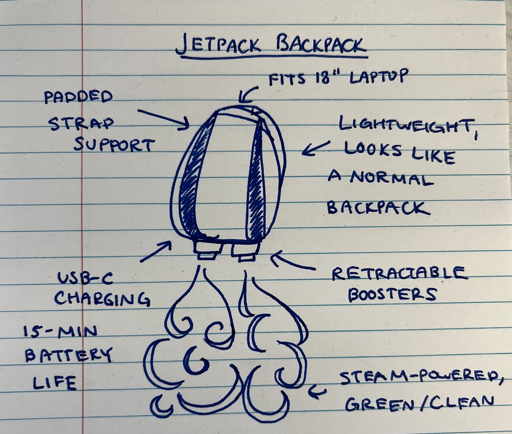

## Forget Traffic: The 'Jetpack Backpack' Sketch That's Got Us Dreaming!

We stumbled upon a concept sketch that's equal parts practical and pure sci-fi awesome. Forget waiting for a bus or getting stuck in gridlock – imagine just *lifting off*!

Behold: The **JETPACK BACKPACK**.

This isn't just a fantasy; the sketch details a surprisingly thoughtful design. For starters, it looks like a **normal backpack**, making it discreet (until you engage the boosters!). It's **lightweight** and features **padded strap support** for comfort, and yes, it even **fits an 18" laptop**. So, all your daily essentials are covered.

But the real magic? **Retractable boosters** powered by **steam**! Yep, this concept is aiming for **green/clean** personal flight. Charging is modern and convenient via **USB-C**.

Now, the sketch does note a **15-min battery life**, so maybe it's more for short hops over congested areas or epic entrances than cross-country travel. But hey, 15 minutes of avoiding traffic? Sign us up!

While this might just be a cool idea on paper for now, it sparks the imagination. Is this the future of commuting? We can only hope! Who wouldn't want a backpack that gives you the ultimate shortcut?

In [17]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [18]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

print(response.text)

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what's appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.

In [19]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Seriously, Universe? *This* is your master plan for tonight?!" (Implying the universe is petty or incompetent for causing your pain).
2.  "Your design is clearly flawed, Universe! You call this order?!" (Questioning the universe's fundamental quality or structure based on your immediate discomfort).

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [20]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [21]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Okay, here's a function in Python that checks if a year is a leap year based on the standard Gregorian calendar rules.

The rules are:
1.  A year is a leap year if it is divisible by 4.
2.  *However*, if the year is divisible by 100, it is NOT a leap year, UNLESS...
3.  The year is also divisible by 400. In that case, it IS a leap year.

```python
import calendar # Python's built-in calendar module has this functionality, but let's implement it manually first.

def is_leap_year(year: int) -> bool:
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Args:
    year: The year to check (an integer).

  Returns:
    True if the year is a leap year, False otherwise.
  """
  # Rule 3: If divisible by 400, it's a leap year.
  if (year % 400 == 0):
    return True
  # Rule 2: If divisible by 100 but NOT 400, it's NOT a leap year.
  elif (year % 100 == 0):
    return False
  # Rule 1: If divisible by 4 but NOT 100, it's a leap year.
  elif (year % 4 == 0):
    return True
  # If none of the above, it's NOT a leap year.
  else:
    return False

# --- Examples ---
print(f"Is 2000 a leap year? {is_leap_year(2000)}") # Divisible by 400 -> True
print(f"Is 1900 a leap year? {is_leap_year(1900)}") # Divisible by 100 but not 400 -> False
print(f"Is 2004 a leap year? {is_leap_year(2004)}") # Divisible by 4 but not 100 -> True
print(f"Is 2001 a leap year? {is_leap_year(2001)}") # Not divisible by 4 -> False
print(f"Is 2024 a leap year? {is_leap_year(2024)}") # Divisible by 4 but not 100 -> True
print(f"Is 2100 a leap year? {is_leap_year(2100)}") # Divisible by 100 but not 400 -> False
print(f"Is 2400 a leap year? {is_leap_year(2400)}") # Divisible by 400 -> True

# --- More Concise Version ---
# This version combines the conditions using boolean logic.
# A year is a leap year if (divisible by 4 AND not divisible by 100) OR (divisible by 400).
def is_leap_year_concise(year: int) -> bool:
    """
    Checks if a given year is a leap year (concise version).

    Args:
      year: The year to check (an integer).

    Returns:
      True if the year is a leap year, False otherwise.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

print("\n--- Concise Version Examples ---")
print(f"Is 2000 a leap year? {is_leap_year_concise(2000)}")
print(f"Is 1900 a leap year? {is_leap_year_concise(1900)}")
print(f"Is 2004 a leap year? {is_leap_year_concise(2004)}")
print(f"Is 2001 a leap year? {is_leap_year_concise(2001)}")


# --- Using the built-in calendar module (Recommended for real-world code) ---
print("\n--- Using calendar module ---")
print(f"Is 2000 a leap year (calendar)? {calendar.isleap(2000)}")
print(f"Is 1900 a leap year (calendar)? {calendar.isleap(1900)}")
print(f"Is 2004 a leap year (calendar)? {calendar.isleap(2004)}")
print(f"Is 2001 a leap year (calendar)? {calendar.isleap(2001)}")
```

**Explanation:**

1.  **`is_leap_year(year)` Function:**
    *   It takes an integer `year` as input.
    *   It first checks if `year` is perfectly divisible by 400 (`year % 400 == 0`). If it is, it immediately returns `True` because years divisible by 400 are always leap years.
    *   If not divisible by 400, it then checks if `year` is perfectly divisible by 100 (`year % 100 == 0`). If it is (and we already know it's not divisible by 400), it returns `False` because years divisible by 100 but not 400 are not leap years (e.g., 1900, 2100).
    *   If not divisible by 400 and not divisible by 100, it checks if `year` is perfectly divisible by 4 (`year % 4 == 0`). If it is, it returns `True` (e.g., 2004, 2024).
    *   If none of the above conditions are met, it means the year is not divisible by 4, so it returns `False`.

2.  **`is_leap_year_concise(year)` Function:**
    *   This version uses a single return statement with a boolean expression that directly implements the combined rules: `(divisible by 4 AND not divisible by 100) OR (divisible by 400)`. This is often considered more "Pythonic" once you understand the logic.

3.  **`calendar.isleap(year)`:**
    *   Python's built-in `calendar` module has a function `isleap()` that does exactly this. For real-world applications, using the standard library function is generally preferred as it's well-tested and maintained.

Choose the version you find easiest to read or most appropriate for your needs. The first two manually implement the logic, while the third shows how to use Python's standard library.

In [22]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, here's a unit test for the `is_leap_year` function using Python's built-in `unittest` framework.

First, let's assume your `is_leap_year` function is defined (we'll include it in the test file for simplicity, but in a real project, it would likely be in a separate file and imported).

```python
# Assuming this function is defined, e.g., in a file named 'date_utils.py'
# from date_utils import is_leap_year

# For demonstration purposes, we'll include the function here:
def is_leap_year(year: int) -> bool:
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Args:
    year: The year to check (an integer).

  Returns:
    True if the year is a leap year, False otherwise.
  """
  # Rule 3: If divisible by 400, it's a leap year.
  if (year % 400 == 0):
    return True
  # Rule 2: If divisible by 100 but NOT 400, it's NOT a leap year.
  elif (year % 100 == 0):
    return False
  # Rule 1: If divisible by 4 but NOT 100, it's a leap year.
  elif (year % 4 == 0):
    return True
  # If none of the above, it's NOT a leap year.
  else:
    return False

# --- Unit Tests ---

import unittest

class TestIsLeapYear(unittest.TestCase):

    def test_divisible_by_400_is_leap(self):
        """Test years divisible by 400 (should be leap)."""
        self.assertTrue(is_leap_year(2000))
        self.assertTrue(is_leap_year(2400))
        self.assertTrue(is_leap_year(1600))

    def test_divisible_by_100_not_400_is_not_leap(self):
        """Test years divisible by 100 but not 400 (should not be leap)."""
        self.assertFalse(is_leap_year(1900))
        self.assertFalse(is_leap_year(2100))
        self.assertFalse(is_leap_year(1800))

    def test_divisible_by_4_not_100_is_leap(self):
        """Test years divisible by 4 but not 100 (should be leap)."""
        self.assertTrue(is_leap_year(2004))
        self.assertTrue(is_leap_year(2020))
        self.assertTrue(is_leap_year(1996))
        self.assertTrue(is_leap_year(2024))

    def test_not_divisible_by_4_is_not_leap(self):
        """Test years not divisible by 4 (should not be leap)."""
        self.assertFalse(is_leap_year(2001))
        self.assertFalse(is_leap_year(2003))
        self.assertFalse(is_leap_year(1999))
        self.assertFalse(is_leap_year(2023))
        self.assertFalse(is_leap_year(1700)) # Not div by 4
        self.assertFalse(is_leap_year(1901)) # Not div by 4

# This allows running the tests directly from the command line
if __name__ == '__main__':
    unittest.main(verbosity=2)
```

**Explanation:**

1.  **`import unittest`**: Imports the necessary `unittest` module.
2.  **`class TestIsLeapYear(unittest.TestCase):`**: Creates a test class named `TestIsLeapYear` that inherits from `unittest.TestCase`. This is required by the `unittest` framework.
3.  **`test_*` Methods**: Each method inside the class that starts with `test_` is treated as an individual test case. We create separate tests for each major rule/scenario:
    *   Years divisible by 400.
    *   Years divisible by 100 but not 400.
    *   Years divisible by 4 but not 100.
    *   Years not divisible by 4.
4.  **Assertions**: Inside each test method, we call the `is_leap_year` function with specific test years. We then use assertion methods from `unittest.TestCase` to check if the result is as expected:
    *   `self.assertTrue(condition)`: Asserts that the `condition` is `True`. Used for years that *should* be leap years.
    *   `self.assertFalse(condition)`: Asserts that the `condition` is `False`. Used for years that *should not* be leap years.
5.  **`if __name__ == '__main__': unittest.main()`**: This standard Python construct allows you to run the tests directly from the command line by executing the script. `verbosity=2` provides more detailed output about which tests ran.

**How to Run the Tests:**

1.  Save the code above in a Python file (e.g., `test_leap_year.py`).
2.  Open your terminal or command prompt.
3.  Navigate to the directory where you saved the file.
4.  Run the command: `python test_leap_year.py`

You should see output indicating that the tests are discovered and run, and if all tests pass, it will report "OK". If any test fails, it will provide details about which test failed and why.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [23]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [24]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function I generated and provided a unit test for is `is_leap_year`.

I also provided a more concise version called `is_leap_year_concise`. The unit tests were specifically written for the `is_leap_year` function.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [25]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless favorite, these classic chocolate chip cookies are soft in the center, slightly crisp at the edges, and loaded with gooey chocolate chips.",
    "recipe_ingredients": [
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "2 large eggs",
        "1 teaspoon vanilla extract",
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1/2 teaspoon salt",
        "2 cups (12 oz) chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

image/png


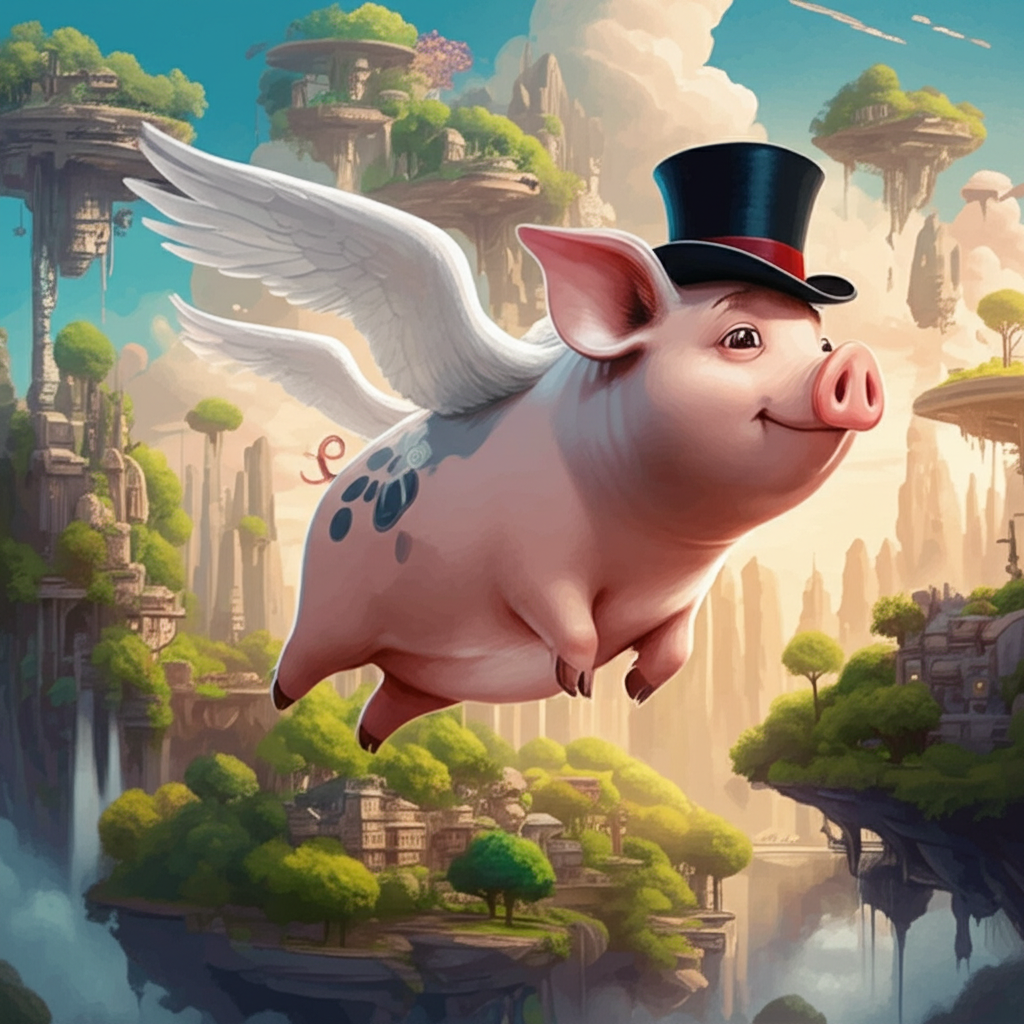

In [26]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

Note that if you are using a thinking model, it will only strat streaming after finishing its thinking process.

In [27]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text)
  print("*****************")

Unit 7
*****************
34 was a maintenance droid in the Great Scrap Plains, a rust-colored ocean
*****************
 of discarded technology stretching further than his optical sensors could scan. His days were a monotonous loop
*****************
: patrol grid sector Gamma-7, identify unstable scrap piles, engage compactors, report
*****************
 anomalies (though there were never any). He performed his tasks flawlessly, his internal processors humming
*****************
 with perfect efficiency. But in the quiet hum, beneath the whirring gears
*****************
 and clanking metal, was an emptiness that data logs couldn't quantify:
*****************
 loneliness.

He was the only active unit in Gamma-7. The comm
*****************
s channels were silent save for automated system checks from a distant, unseen central hub. The other
*****************
 derelict machines lay inert, their circuits dead, their metal shells slowly dissolving into the dust.
*****************
 Unit 734 some

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [28]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

Okay, gather 'round! Let's sing the tale of a most unusual friend...

**The Ballad of Squeaky, the Chrono-Squirrel**

(Verse 1)
In a park beneath an old oak tree
Lived a squirrel as busy as could be
Named Squeaky, with fur of brown and gray
Always hiding nuts throughout the day
One afternoon, beside a rusty bin
He found a gizmo, strange within
It whirred and clicked, it glowed quite bright
He strapped it on, with all his might!

(Chorus)
Oh, Squeaky the squirrel, with a whirr and a flash
He's leaping through time, in a historical dash!
From aeons ago to tomorrow's bright gleam
A time-traveling squirrel, living the dream!
He's looking for nuts, or maybe a friend
On adventures in time that never quite end!

(Verse 2)
With a pop and fizz, the world went strange
He landed where giant lizards would range!
He zipped past a T-Rex, tall and grand
Tried to bury an acorn in ancient sand
He climbed a fern, saw pterodactyls fly
Just a tiny squirrel beneath a prehistoric sky
He dodged a foot that shook the ground
No easy hiding spots could be found!

(Chorus)
Oh, Squeaky the squirrel, with a whirr and a flash
He's leaping through time, in a historical dash!
From aeons ago to tomorrow's bright gleam
A time-traveling squirrel, living the dream!
He's looking for nuts, or maybe a friend
On adventures in time that never quite end!

(Verse 3)
Next stop was Rome, all marble and gold
Stories of Caesars, brave and bold
He scurried past a legionnaire's boot
Tried to bury a nut at a statue's root
Saw chariots racing, a bustling street
But cobblestones are tough for squirrelly feet!
He grabbed a dropped grape, a quick, sweet prize
With ancient wonders in his small eyes.

(Chorus)
Oh, Squeaky the squirrel, with a whirr and a flash
He's leaping through time, in a historical dash!
From aeons ago to tomorrow's bright gleam
A time-traveling squirrel, living the dream!
He's looking for nuts, or maybe a friend
On adventures in time that never quite end!

(Bridge)
He's seen the future, shiny and sleek
Where buildings touch clouds, unique
He's seen knights in armor, dragons so tall
Survived the ice age and every great wall
He's just a squirrel, fluffy and fast
Making tiny footprints throughout the past.

(Verse 4)
He's buried nuts near pyramids old and vast
Hoped the mummies wouldn't make them last!
He's left little treasures for pirates to find
Left acorn clues for all of humankind!
Though history books won't tell his tale
Squeaky's adventures will never fail!

(Chorus)
Oh, Squeaky the squirrel, with a whirr and a flash
He's leaping through time, in a historical dash!
From aeons ago to tomorrow's bright gleam
A time-traveling squirrel, living the dream!
He's looking for nuts, or maybe a friend
On adventures in time that never quite end!

(Outro)
So if you see a flicker, a blur in the air
A tiny brown shadow beyond compare
It might just be Squeaky, on the move once more
Exploring all time, from the core to the shore!
With a click and a whirr... he's gone!
Till the next time jump... at the break of dawn!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

In [29]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb)

In [30]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The word is: strawberry
The letter to count is: r
The count of 'r' in 'strawberry' is: 3


---

The word "strawberry" has 3 instances of the letter 'r'.

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you have larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file


In [31]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [32]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

Okay, based on that sketch, here's a short and engaging blog post idea!

---

**Title: Move Over, Public Transport: The Jetpack Backpack is Here! (Concept Art!)**

Stuck in traffic? Wishing you could just zoom over the gridlock? Well, buckle up (or maybe just strap on your shoulders!), because we spotted a sketch that might just be the answer to our commuting dreams: The Jetpack Backpack!

From the looks of this awesome concept art, someone is dreaming big. Imagine a backpack that's not just great for carrying your gear (it even fits an 18" laptop and has padded strap support!), but also packs a serious punch... downwards!

We're talking retractable boosters, people! And get this – the sketch labels them as steam-powered, aiming for a "green/clean" commute. Plus, it charges via USB-C, because even futuristic flight tech needs modern connectivity.

Okay, okay, the sketch *does* say "15-min battery life." Maybe just enough to hop over that particularly bad intersection, make a dramatic entrance at your coffee spot, or finally reach that top shelf. It *is* lightweight and looks like a normal backpack when the boosters are tucked away, which is a nice touch for blending in before you blast off.

While it might still be firmly in the concept stage (and that 15-minute flight time definitely needs some R&D!), the idea of a "Jetpack Backpack" is undeniably cool and sparks the imagination.

What would *you* use your 15 minutes of jetpack time for? Let us know in the comments!

---

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [33]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [34]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

Okay, here is a summary of the Apollo 11 Technical Air-to-Ground Voice Transmission (GOSS NET 1) provided:

The transcription covers the voice communications between the Apollo 11 spacecraft crew (CDR, CMP, LMP) and Mission Control Center (Houston, represented primarily by various Capsule Communicators - CC) and remote ground stations (CT) throughout their mission, from launch preparations through splashdown and recovery.

The communications are structured chronologically, marked by Mission Elapsed Time (GET) and often indicating the ground station in contact with the spacecraft. Key phases and interactions include:

1.  **Launch and Earth Orbit:** Standard launch procedures and confirmations. Crew reports roll program completion, staging, engine ignition, skirt and tower separation. Houston confirms parameters and provides GO calls for staging and orbital insertion. The crew expresses positive feedback on the launch vehicle ride.

2.  **Trans Lunar Coast (TLC):** Communications shift to remote sites as the spacecraft orbits and then departs Earth orbit. Initial post-insertion checks, orbital parameters are relayed. The crew performs the Transposition and Docking maneuver with the Lunar Module (LM). They discuss maneuver performance, gas usage, and minor issues like an RCS heater problem. Navigation updates (PADs) and alignment procedures (P52) are frequently discussed, including troubleshooting issues with star sightings and horizon alignment. The crew provides vivid descriptions of Earth views from increasing distances. Passive Thermal Control (PTC) is initiated and monitored, requiring troubleshooting of erratic motion. News reports from Earth are read up.

3.  **Lunar Orbit Insertion (LOI):** The crew and Mission Control prepare for the LOI burn. GO for LOI is given. Following the burn, the crew reports burn parameters and orbit insertion success. They discuss the performance of the Service Propulsion System (SPS) engine and express satisfaction with the maneuver and resulting lunar orbit.

4.  **Lunar Module (Eagle) Activation & Descent:** The LM is activated and checked out. Prep for undocking is performed. Undocking is confirmed with the famous line "The Eagle has wings." The Descent Orbit Insertion (DOI) burn is performed. Preparation for Powered Descent (PDI) includes PADs, system checks, and configuration. During PDI, altitude callouts are made, and program alarms (1201, 1202) are noted and cleared by Mission Control as expected. The crew manually takes control to land the LM, reporting landing site visibility and difficulty with automated targeting.

5.  **Lunar Landing (Tranquility Base):** The landing is confirmed with the historic phrase, "Houston, Tranquility Base here, the Eagle has landed." Mission Control expresses relief and congratulations. Post-landing checks and procedures are carried out, including venting the descent tanks. The crew begins providing initial descriptions of the lunar surface and their surroundings at Tranquility Base.

6.  **Lunar Surface Extravehicular Activity (EVA):** The transcription details the preparations for the EVA, including doffing flight suits and donning PLSS (Portable Life Support System) backpacks. Cabin depressurization is performed. Neil Armstrong egresses first, providing the iconic "One small step..." commentary and initial observations of the surface texture and walking in one-sixth gravity. Buzz Aldrin egresses next. They deploy the flag, scientific instruments (ALSEP, LR3), and collect rock and soil samples (contingency, bulk, core tubes), noting the difficulty of digging and the nature of the lunar soil and rocks. President Nixon makes a congratulatory phone call. The crew provides detailed descriptions of the landscape, experiments, and experiences. EVA termination procedures are performed, including packing samples and returning to the LM.

7.  **Lunar Module Ascent & Rendezvous:** Preparations for ascent are made, including jettisoning unused equipment. The ascent burn is performed successfully, putting Eagle into lunar orbit. VHF ranging is used to track the Command Module (Columbia), and maneuvers (CSI, TPI) are performed to close the distance. Radar lock is achieved. The LM and CSM dock successfully, and the crew is safely back together in Columbia. Post-docking checks and transfers are performed.

8.  **Trans Earth Coast (TEC):** Following rendezvous and powerdown of the LM, the crew performs the Trans Earth Injection (TEI) burn to depart lunar orbit and head home. During the journey back, communications include system status checks, discussions about PTC, navigation updates, waste water dumps, and notable TV broadcasts showing samples, zero-gravity demonstrations (drinking from a spoon, gyroscope), and views of the receding Moon and growing Earth. News reports from Earth continue to highlight the mission's global impact. Preparations for entry are made, including final PADs and checklist updates.

9.  **Entry and Splashdown:** The crew configures the spacecraft for atmospheric entry. The Command Module separates from the Service Module. Communications continue during entry, including altitude callouts and parachute deployment confirmations. Splashdown is reported, and the recovery forces (Hornet, helicopters) establish contact and confirm the crew's condition.

Throughout the transcription, different CAPCOM teams (White, Black, Green, Purple/Maroon) take turns on watch, providing support, relaying information, and maintaining communication links through various ground stations and antennas. The tone shifts from formal procedures during critical maneuvers to more relaxed exchanges during coast phases, including personal anecdotes, jokes, and observations from both the crew and Mission Control. The successful execution of each phase, despite minor technical issues and timeline adjustments, is evident in the communications.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

In [35]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

In [36]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_input_token_count', 'quotaId': 'GenerateContentInputTokensPerModelPerMinute-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash'}, 'quotaValue': '250000'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '55s'}]}}

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you are able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

In [ ]:
print(video_file.state)

In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You are only able to submit up to one YouTube link per `generate_content` request.

> **Note:** YouTube links included as part of the text input won't being processed in the request, an can lead to incorrect responses. You must explicitly the URL using the `file_uri` argument of `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.



The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you have the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

You will get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/gemini-2/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./Get_started_thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.